In [1]:
import pandas as pd

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
import numpy as np

In [4]:
df = pd.read_parquet('fhv_tripdata_2021-01.parquet')

In [5]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


In [9]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

In [15]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime

In [29]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,0 days 00:17:00
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,0 days 00:17:00
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,0 days 01:50:00
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,0 days 00:08:17
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,0 days 00:15:13
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,0 days 00:08:45
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,0 days 00:57:36
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,0 days 00:16:12
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,0 days 00:19:26


In [ ]:
# lambda is used to apply every element on column

In [31]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [33]:
df.duration.mean()

19.1672240937939

In [35]:
df.duration

0           17.000000
1           17.000000
2          110.000000
3            8.283333
4           15.216667
              ...    
1154107      8.750000
1154108     57.600000
1154109     16.200000
1154110     19.433333
1154111     36.000000
Name: duration, Length: 1154112, dtype: float64

In [34]:
df.duration.describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

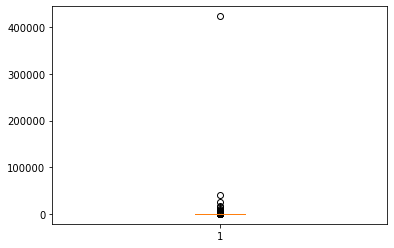

<Figure size 720x504 with 0 Axes>

In [39]:
plt.boxplot(df.duration)
fig = plt.figure(figsize =(10, 7))
plt.show()


In [42]:
# finding the 1st quartile
q1 = np.quantile(df.duration, 0.25)

# finding the 3rd quartile
q3 = np.quantile(df.duration, 0.75)
med = np.median(df.duration)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


14.51666666666667 44.05833333333334 -14.00833333333334


In [45]:
outliers = df.duration[(df.duration <= lower_bound) | (df.duration >= upper_bound)]
print('The following are the outliers in the boxplot:')
print('{}'.format(outliers))

The following are the outliers in the boxplot:
2          110.000000
16          61.000000
46          47.216667
58          46.950000
221         47.766667
              ...    
1153886     47.000000
1153888     56.000000
1153916     47.616667
1153929    139.283333
1154108     57.600000
Name: duration, Length: 69359, dtype: float64


In [44]:
outliers

2          110.000000
16          61.000000
46          47.216667
58          46.950000
221         47.766667
              ...    
1153886     47.000000
1153888     56.000000
1153916     47.616667
1153929    139.283333
1154108     57.600000
Name: duration, Length: 69359, dtype: float64